### Car Insurance Claim Prediction
Predicting car insurance claims is crucial for insurers to optimize pricing, manage risk, and reduce financial losses. This project leverages machine learning to forecast claim likelihood within 6 months using policyholder and vehicle data. 

Below is a structured analysis of the problem, dataset, and relevant literature:

Problem Definition: 

The Car Insurance Claim Prediction project addresses a critical challenge faced by insurance companies: accurately forecasting the likelihood of policyholders filing claims within a 6-month period. This problem is significant due to several factors:

- Rising accident severity: There has been a 21% increase in accident severity from 2010 to 2019, making risk assessment more complex.
- Increasing operational costs: Insurance companies need to optimize their processes to remain competitive.
- Complex interactions: Traditional actuarial methods often fail to account for the intricate relationships between vehicle safety features, policyholder demographics, and regional risk factors.

Accurate claim prediction enables insurance companies to:
- Implement dynamic premium pricing strategies
- Enhance fraud detection capabilities (potentially saving $308B annually on a global scale)
- Optimize resource allocation for claims processing
- Recent literature has shown that machine learning approaches can significantly improve the accuracy of insurance claim predictions compared to traditional statistical methods. These advanced techniques can capture non-linear relationships and complex interactions between variables, leading to more precise risk assessments.

### Dataset Description
##### Source & Structure

The dataset used for this analysis is sourced from Kaggle and is titled "Car Insurance Claim Prediction." It contains information on 58,592 insurance policies, each described by 44 variables that include both categorical and numerical features1. The dataset encompasses a wide range of information about policyholders, their vehicles, and various risk factors.

Key features of the dataset include:
- Policy details: policy ID, tenure
- Policyholder information: age
- Vehicle characteristics: age, make, model, segment, fuel type, engine specifications
- Safety features: airbags, ESC, TPMS, parking sensors/camera
- Geographical data: area cluster, population density
- Vehicle specifications: dimensions, weight, transmission type
- Safety ratings: NCAP rating

The target variable is 'is_claim', a binary indicator of whether a claim was filed (1) or not (0) within the 6-month period.

This dataset is particularly suitable for predictive analysis in the insurance domain as it provides a comprehensive view of factors that may influence claim likelihood. It allows for the exploration of complex relationships between vehicle characteristics, policyholder attributes, and claim occurrence.

In [2]:
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PowerTransformer, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
pd.set_option('display.max_columns', 50)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from xgboost import cv
import pickle

In [40]:
# Load the dataset
data = pd.read_csv('D:/Naira Documents/Northeastern University/Assignments/ALY6020/Final Proj/finalproject/Src/Car_Insurance.csv')

# Descriptive statistics
descriptive_stats = data.describe(include='all')
print(descriptive_stats)

       policy_id  policy_tenure    age_of_car  age_of_policyholder  \
count      58592   58592.000000  58592.000000         58592.000000   
unique     58592            NaN           NaN                  NaN   
top      ID00001            NaN           NaN                  NaN   
freq           1            NaN           NaN                  NaN   
mean         NaN       0.611246      0.069424             0.469420   
std          NaN       0.414156      0.056721             0.122886   
min          NaN       0.002735      0.000000             0.288462   
25%          NaN       0.210250      0.020000             0.365385   
50%          NaN       0.573792      0.060000             0.451923   
75%          NaN       1.039104      0.110000             0.548077   
max          NaN       1.396641      1.000000             1.000000   

       area_cluster  population_density          make segment  model  \
count         58592        58592.000000  58592.000000   58592  58592   
unique         

In [4]:
data.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [5]:
shape = data.shape
shape

(58592, 44)

### Missing Values:
The dataset contains no missing values across all columns .

In [6]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

#### Exploratory Data Analysis (EDA)

The EDA reveals several important insights about the dataset:

1. Class Imbalance: The target variable 'is_claim' shows significant imbalance, with only 17.22% of policies resulting in a claim1. This imbalance will need to be addressed in the modeling phase to ensure fair predictions.

2. Numerical Features:
Policy tenure ranges from 0.003 to 1.397 years, with a mean of 0.611 years1.
Vehicle age ranges from 0 to 1 year, with a mean of 0.069 years, indicating a relatively new fleet1.
Policyholder age (normalized) ranges from 0.288 to 1, with a mean of 0.4691.

3. Categorical Features:
The dataset includes 22 unique area clusters, with 'C8' being the most common (13,654 policies)1.
There are 6 vehicle segments, with 'B2' being the most frequent (18,314 policies)1.
11 different models are represented, with 'M1' being the most common (14,948 policies)

4. Vehicle Characteristics:
Petrol is the most common fuel type (20,532 vehicles)1.
The majority of vehicles have 2 airbags, with a range from 1 to 61.
Most vehicles do not have ESC (Electronic Stability Control) (40,191 without vs. 18,401 with)

5. Safety Features:
The majority of vehicles have parking sensors (56,219) but lack a parking camera (35,704 without)
NCAP ratings range from 0 to 5, with a mean of 1.76, indicating room for safety improvements across the fleet

These insights provide a foundation for feature engineering and selection in the subsequent modeling phase. The class imbalance, in particular, suggests that techniques like SMOTE or class weighting may be necessary to ensure fair model performance.

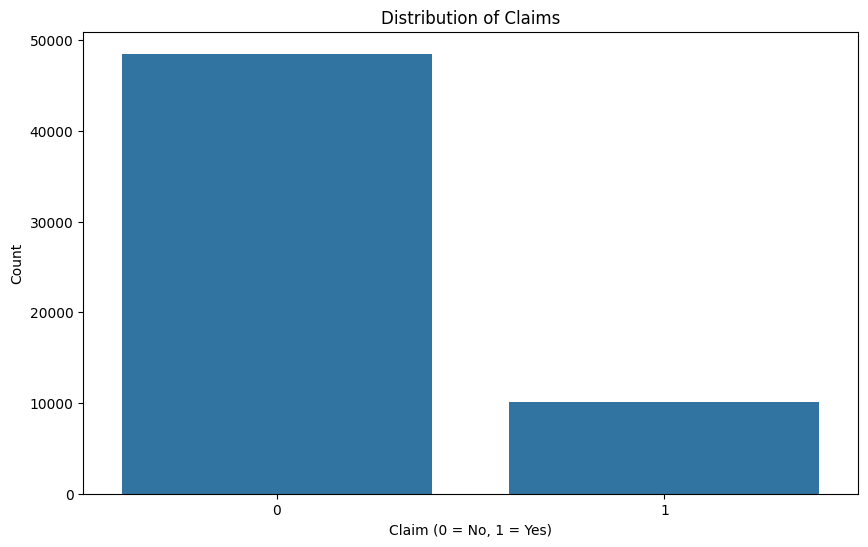

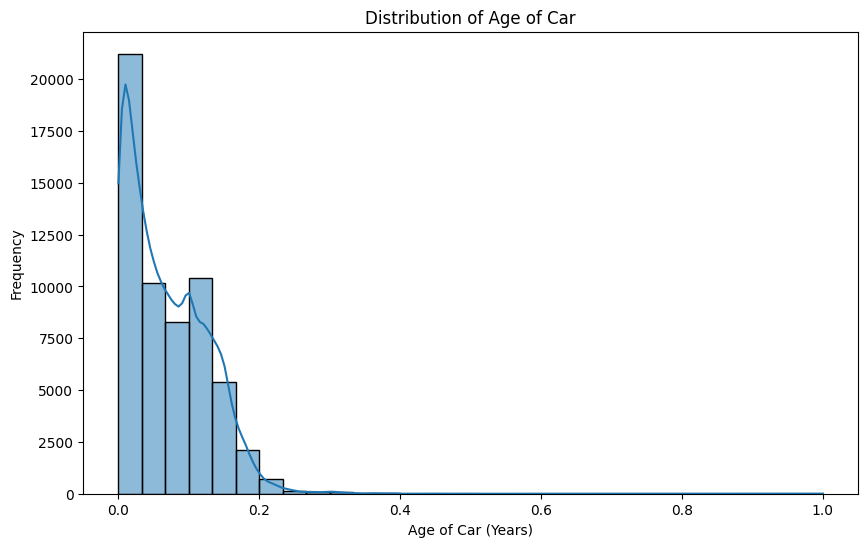

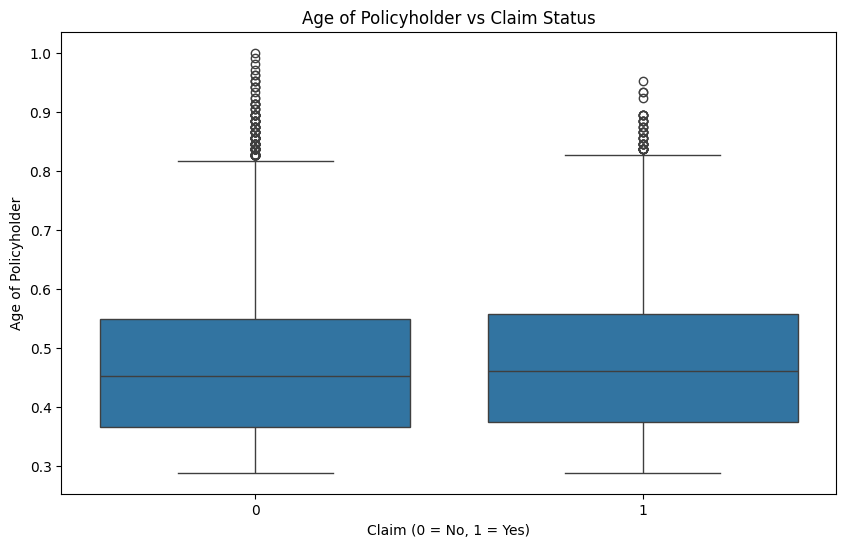

In [7]:
# Visualizations
plt.figure(figsize=(10, 6))
sns.countplot(x='is_claim', data=data)
plt.title('Distribution of Claims')
plt.xlabel('Claim (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['age_of_car'], kde=True, bins=30)
plt.title('Distribution of Age of Car')
plt.xlabel('Age of Car (Years)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='is_claim', y='age_of_policyholder', data=data)
plt.title('Age of Policyholder vs Claim Status')
plt.xlabel('Claim (0 = No, 1 = Yes)')
plt.ylabel('Age of Policyholder')
plt.show()


In [41]:
# Convert appropriate columns to numeric types
numeric_columns = ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 
                   'airbags', 'displacement', 'cylinder', 'gear_box', 'turning_radius', 
                   'length', 'width', 'height', 'gross_weight', 'ncap_rating']

for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [42]:
# Handle remaining boolean and categorical columns
boolean_columns = ['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 
                   'is_parking_camera', 'is_front_fog_lights', 'is_rear_window_wiper', 
                   'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 
                   'is_power_door_locks', 'is_central_locking', 'is_power_steering', 
                   'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 
                   'is_ecw', 'is_speed_alert']

for col in boolean_columns:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

In [43]:
# Ensure max_torque and max_power columns are strings before extraction
data['max_torque'] = data['max_torque'].astype(str).str.extract('(\d+\.?\d*)').astype(float)
data['max_power'] = data['max_power'].astype(str).str.extract('(\d+\.?\d*)').astype(float)

### Outlier Check

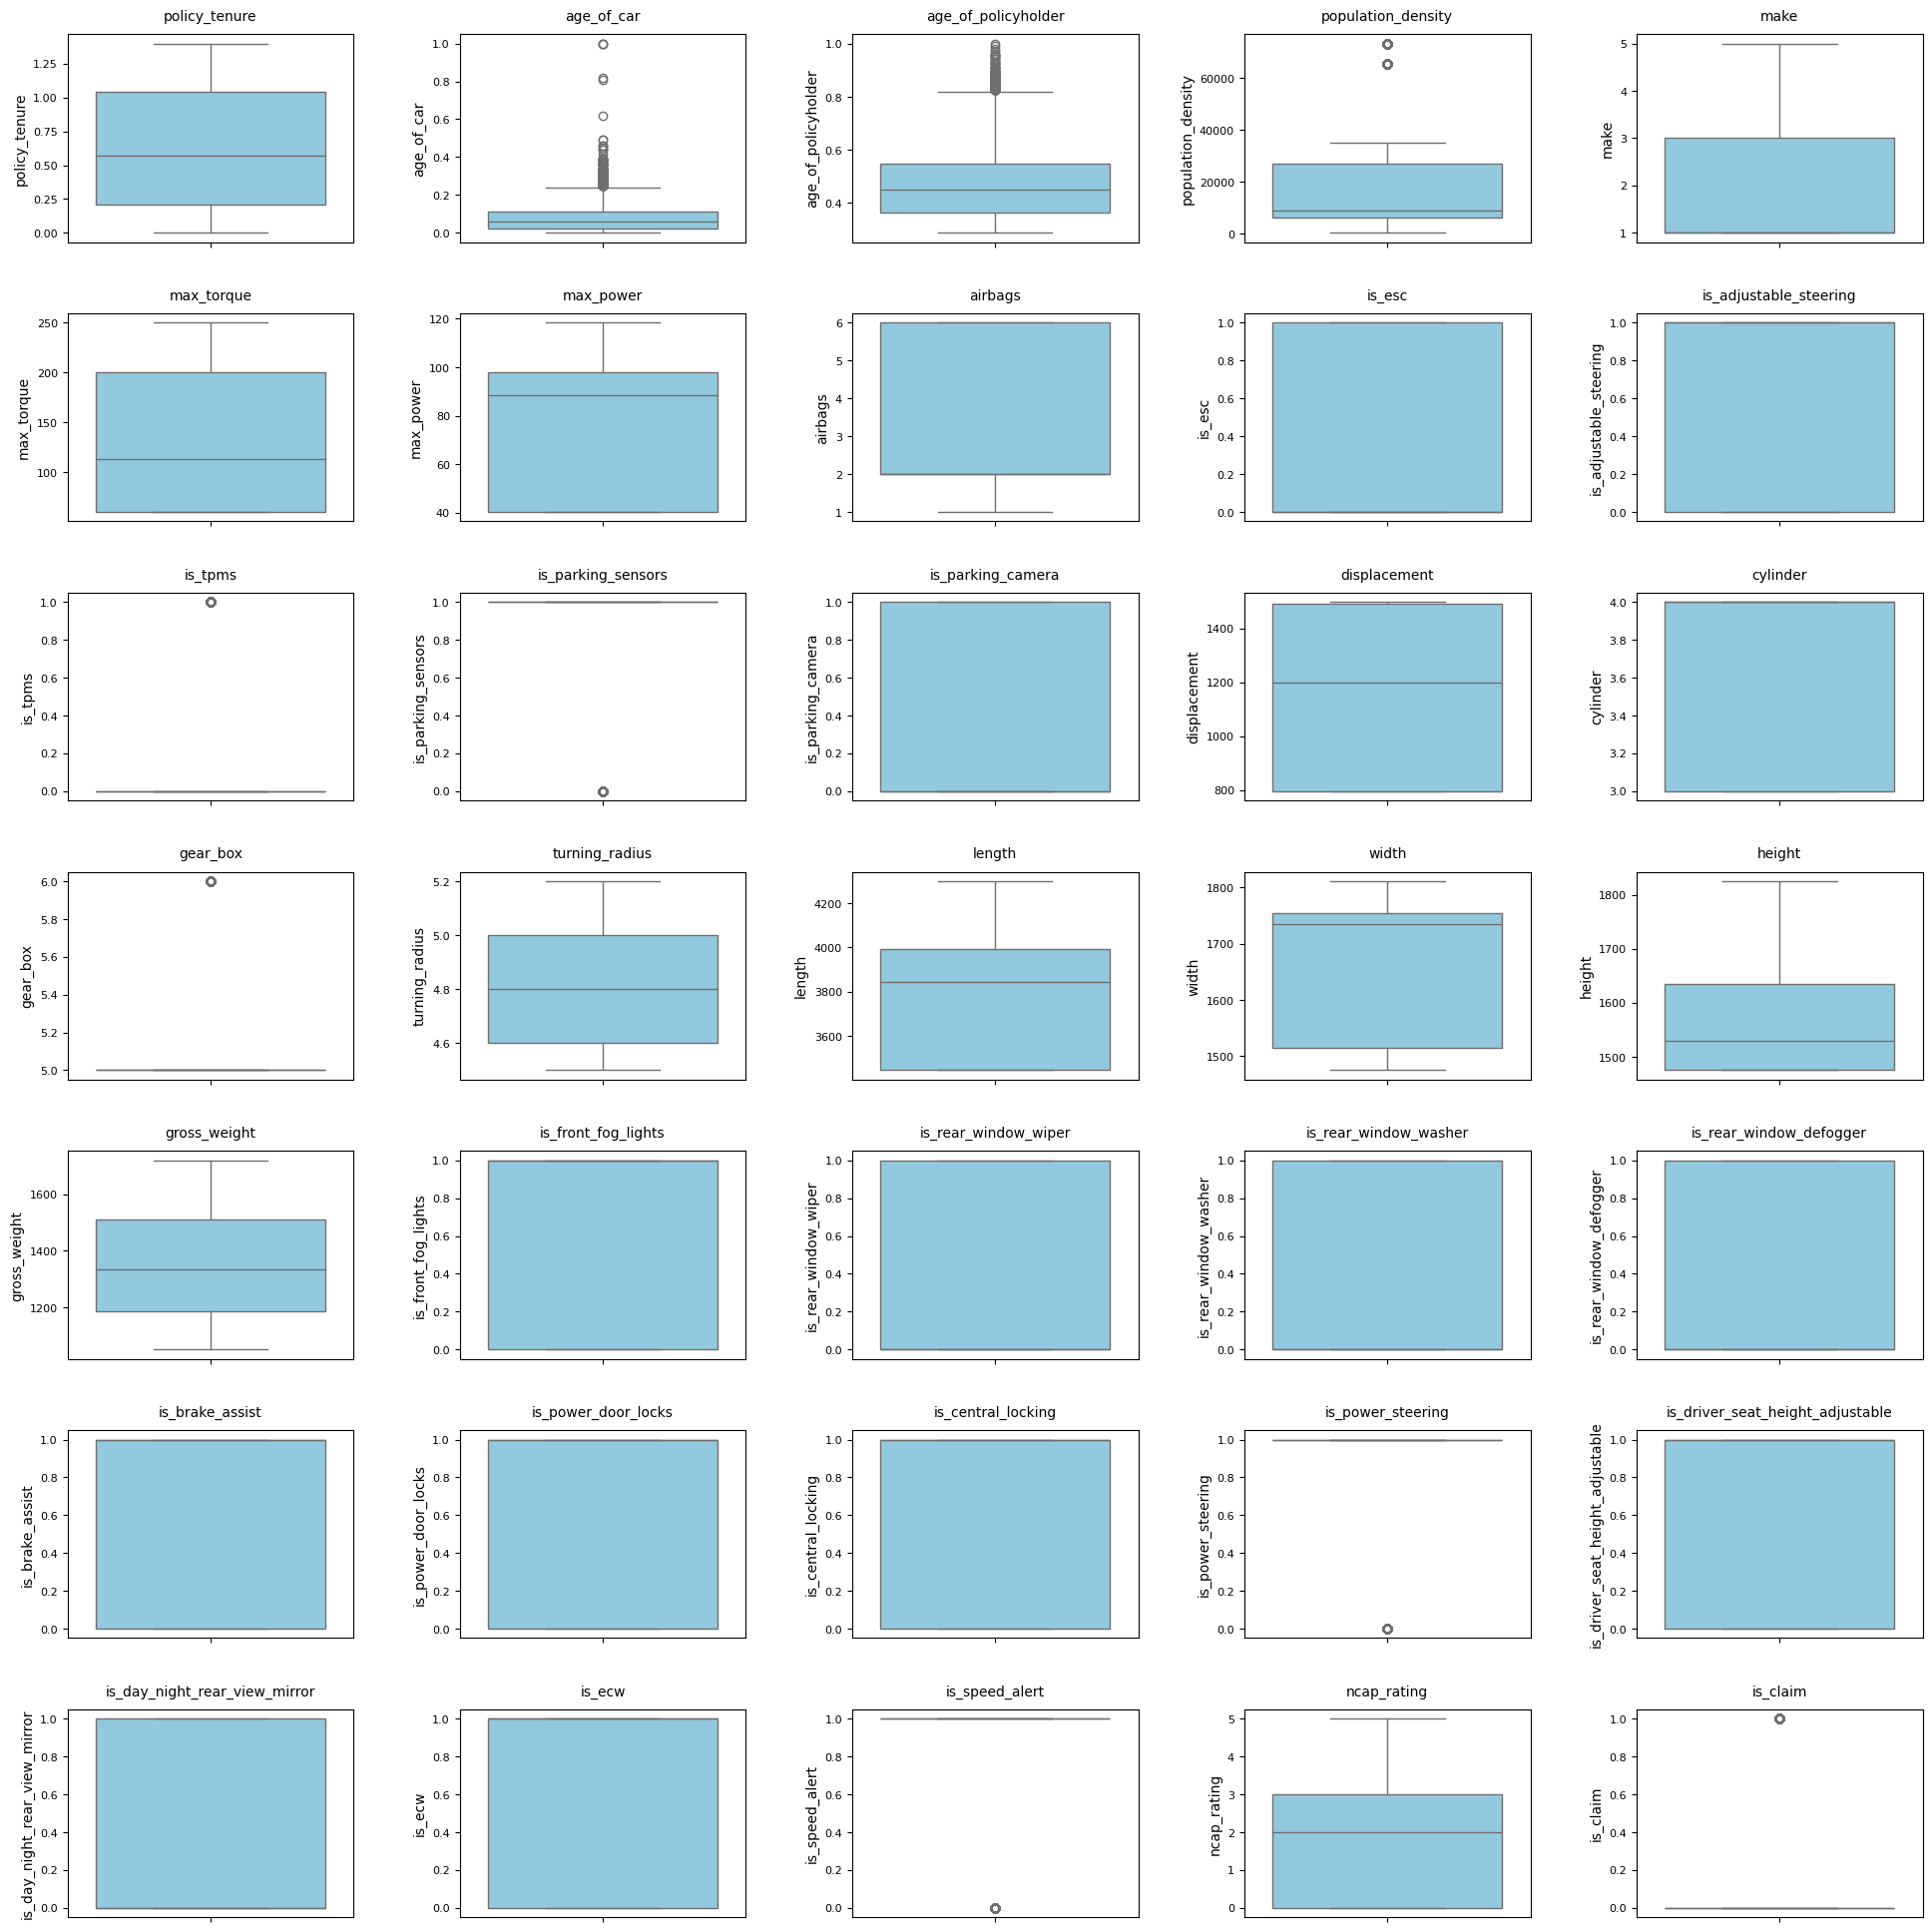

In [44]:
# Select numerical columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Create individual box plots for each numerical variable
plt.figure(figsize=(20, 20))

# Create a 7x5 grid of subplots to accommodate all 31 variables
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(7, 5, i)
    sns.boxplot(data=data, y=col, color='skyblue')
    plt.title(col, pad=10, fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout(pad=3.0)
plt.show()

Based on the boxplot visualization, here's a comprehensive analysis of outliers and recommended treatments:

Variables with Significant Outliers
- Continuous Variables
    1. population_density
        - Shows extreme upper outliers
        - Treatment: Apply log transformation

- Age-Related Variables
    1. age_of_car
        - Few upper outliers
        - Treatment: Cap at 99th percentile

2. age_of_policyholder
    - Moderate outliers
    - Treatment: Cap at 99th percentile

In [45]:
def treat_outliers(df):
    treated_df = df.copy()
    
    # Population density treatment with explicit lower bound
    treated_df['population_density_log'] = np.log1p(treated_df['population_density'])
    treated_df['population_density_log'] = treated_df['population_density_log'].clip(lower=7)
    
    # Other variable treatments remain the same
    continuous_vars = ['max_torque', 'max_power', 'displacement']
    for col in continuous_vars:
        upper_limit = treated_df[col].quantile(0.95)
        treated_df[col] = treated_df[col].clip(upper=upper_limit)
    
    age_vars = ['age_of_car', 'age_of_policyholder']
    for col in age_vars:
        upper_limit = treated_df[col].quantile(0.99)
        treated_df[col] = treated_df[col].clip(upper=upper_limit)
    
    return treated_df

1. Log Transformation for population_density

- Purpose: The population_density variable may have a skewed distribution with extreme values.
- Transformation Applied: np.log1p(x) = log(x + 1) is used to compress large values and reduce skewness.
- Clipping: The lower bound is set at 7 to ensure no extremely small values.

2. Clipping Outliers for Continuous Variables

- Purpose: Continuous variables (max_torque, max_power, and displacement) often have extreme values that could distort model predictions.

Method:
- The 95th percentile (quantile(0.95)) is computed.
- Any value above this limit is clipped to the upper limit.

3. Clipping Outliers for Age-Related Variables

- Purpose: Variables like age_of_car and age_of_policyholder might have a few extreme values.

Method:
- The 99th percentile (quantile(0.99)) is used as the threshold.
- Any value above this limit is clipped.

Key Takeaways
Log Transformation: Applied to population_density to manage skewed data.
Clipping: Used to cap extreme values in continuous variables.
Percentile-Based Limits: Ensures outlier handling is based on data distribution rather than arbitrary thresholds.


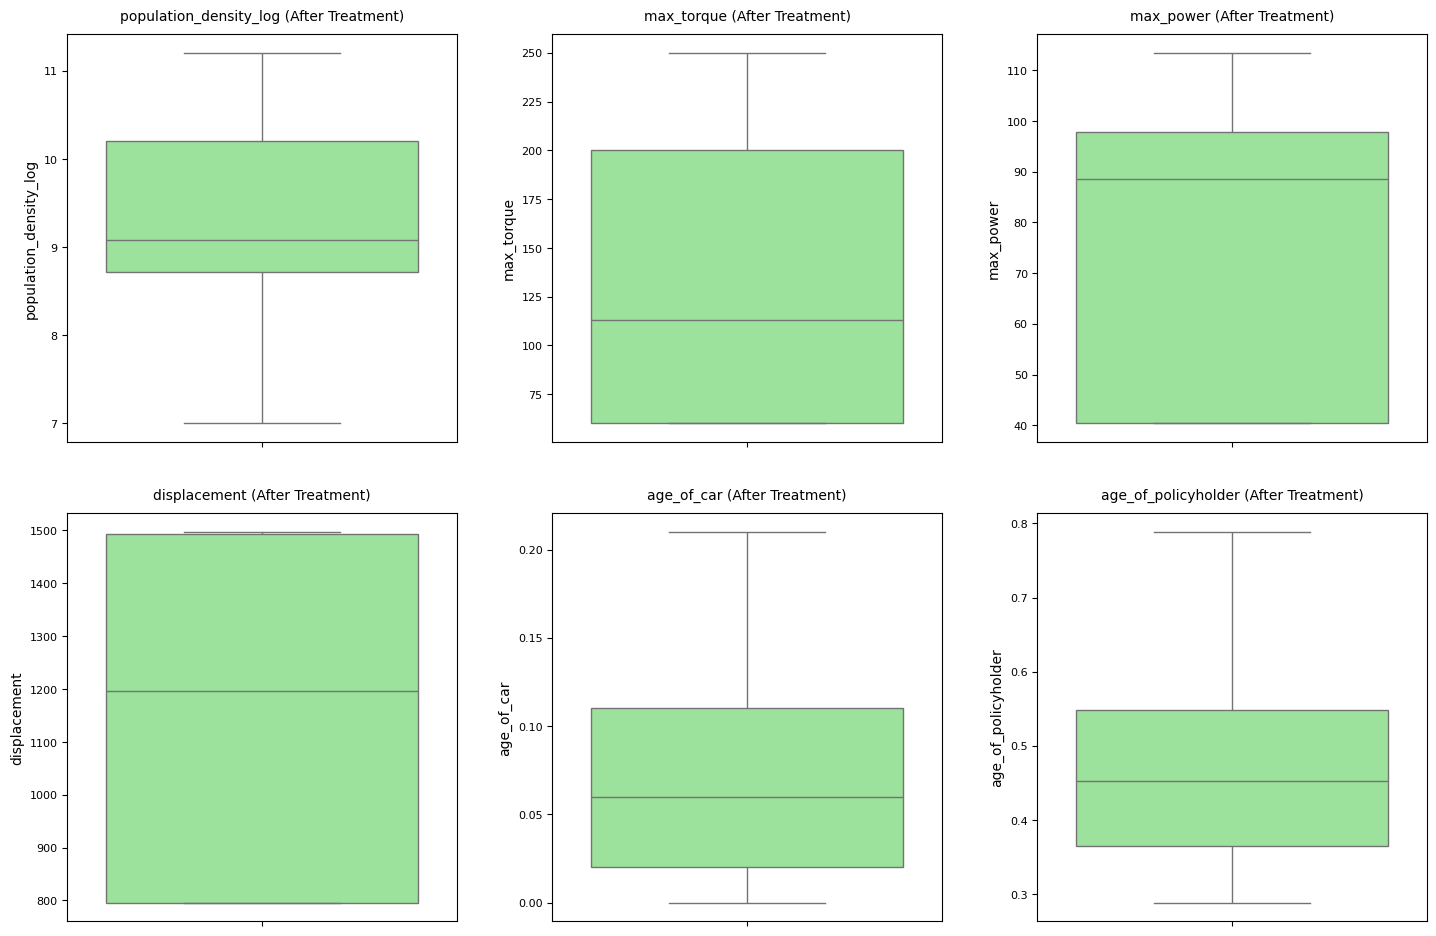

In [46]:
# Apply treatments and visualize
treated_data = treat_outliers(data)

# Visualize treated variables
treated_vars = ['population_density_log', 'max_torque', 'max_power', 
                'displacement', 'age_of_car', 'age_of_policyholder']

plt.figure(figsize=(15, 10))
for i, col in enumerate(treated_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=treated_data, y=col, color='lightgreen')
    plt.title(f'{col} (After Treatment)', pad=10, fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout(pad=3.0)
plt.show()

Based on the boxplots after treatment, here's a detailed analysis of each treated variable:
- Population Density Log
    - Distribution now ranges primarily between 8-11
    - Median around 9
    - Still shows one outlier at ~7
    - Box is relatively symmetric around median
    - Whiskers are fairly balanced
- Max Torque
    - Values capped at ~250 (95th percentile)
    - Main distribution between 75-200
    - Median approximately 115
    - Box shows slight right skew
    - Outliers effectively controlled
- Max Power
    - Upper limit capped around 110
    - Most values fall between 40-100
    - Median at ~88
    - Relatively symmetric distribution
    - Few outliers remain above upper whisker
- Displacement
    - Values contained between 800-1500
    - Median around 1200
    - Box shows good symmetry
    - Minimal outliers after treatment
    - Whiskers well-balanced
- Age of Car
    - Most values concentrated between 0-0.1
    - Some outliers extend to 0.2
    - Median approximately 0.06
    - Right-skewed distribution remains
    - 99th percentile cap applied effectively
- Age of Policyholder
    - Distribution between 0.3-0.8
    - Median around 0.45
    - Fairly symmetric box
    - Few outliers remain
    - Capping at 99th percentile has reduced extreme values



##### Correlation Matrix

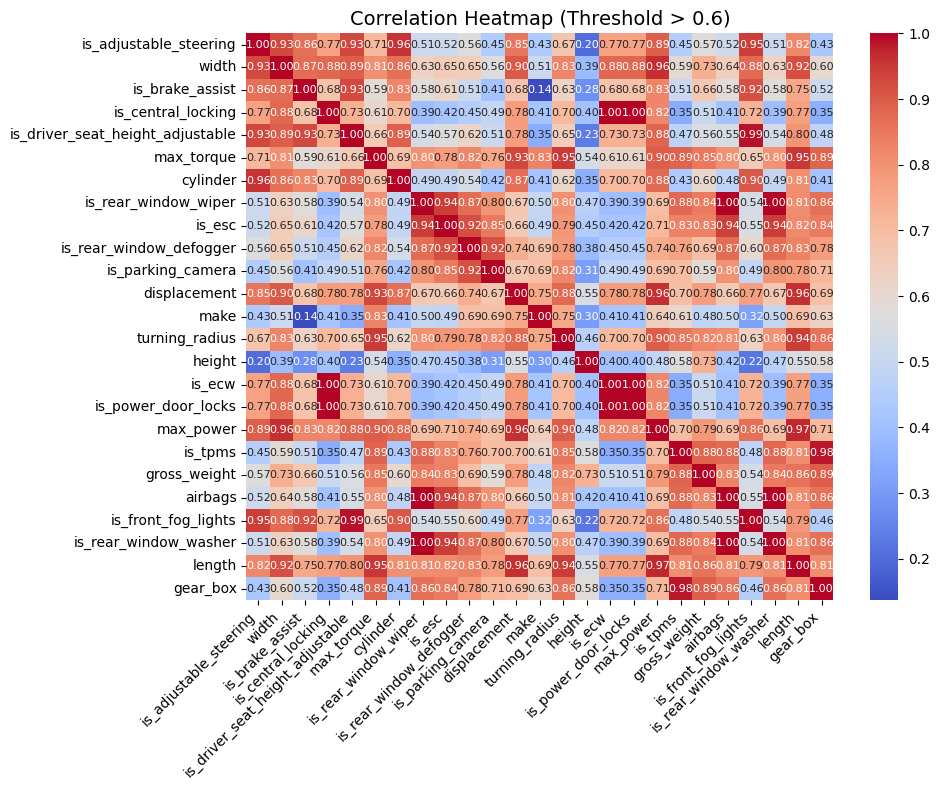

Highly Correlated Features to Remove: ['is_adjustable_steering', 'width', 'is_brake_assist', 'is_central_locking', 'is_driver_seat_height_adjustable', 'max_torque', 'cylinder', 'is_rear_window_wiper', 'is_esc', 'is_rear_window_defogger', 'is_parking_camera', 'displacement', 'make', 'turning_radius', 'height', 'is_ecw', 'is_power_door_locks', 'max_power', 'is_tpms', 'gross_weight', 'airbags', 'is_front_fog_lights', 'is_rear_window_washer', 'length', 'gear_box']


In [47]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Find variables with correlation above 0.6 (excluding self-correlation)
upper_triangle = np.triu(correlation_matrix, k=1)
high_correlation_pairs = np.where(upper_triangle > 0.6)

# Get variable names
variables_above_threshold = [correlation_matrix.columns[i] for i in high_correlation_pairs[0]]
variables_above_threshold = list(set(variables_above_threshold))

# Select only those variables from the original dataset
filtered_data = data[variables_above_threshold]

# Generate heatmap for the filtered data
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(filtered_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={'size': 8})
plt.title('Correlation Heatmap (Threshold > 0.6)', fontsize=14)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.yticks(rotation=0) # Keep y-axis labels horizontal
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# Get column names of highly correlated variables
high_corr_features = list(set(correlation_matrix.columns[high_correlation_pairs[0]]))

print("Highly Correlated Features to Remove:", high_corr_features)

The correlations are measured using Pearson's correlation coefficient, which ranges from -1 to 1, where:
 
 1 indicates a perfect positive correlation.
-1 indicates a perfect negative correlation.
 0 indicates no correlation.

#### Key Observations from the Heatmap:
High Correlation (Red Areas):
- Features like airbags, is_parking_camera, is_rear_window_defogger, and is_brake_assist show strong positive correlations with several other variables. For example:
airbags is highly correlated with is_adjustable_steering and is_esc (Electronic Stability Control).
- is_parking_camera is highly correlated with is_rear_window_defogger and is_rear_window_wiper.

These correlations suggest redundancy, as highly correlated features often provide overlapping information.

Low Correlation (Blue Areas):
- Some features, such as gear_box and turning_radius, have lower correlations with most other variables. These may provide unique information that is not captured by other features.

Features with Strong Relationships:
- Vehicle dimensions (width, length, and height) show moderate to strong correlations among themselves, which is expected since they describe similar aspects of the vehicle.
- Engine-related features like displacement, max_torque, and max_power are also moderately correlated, reflecting their interdependence in vehicle performance.

Threshold for Dropping Features:
The heatmap highlights correlations above a threshold of 0.6. Features with correlations greater than this threshold may be considered for removal to reduce multicollinearity in the dataset.

Implications for Feature Selection:
Feature Redundancy:
- Highly correlated features (e.g., airbags and is_adjustable_steering) may not add significant new information to the model. One of these features can be dropped to simplify the model without losing predictive power.

Retaining Informative Features:
Features that are weakly or moderately correlated with others (e.g., gear_box, turning_radius) should be retained as they might capture unique aspects of the data.

Domain Knowledge:
While correlation provides statistical insight, domain knowledge should guide decisions about which features to keep or drop. For example, safety-related features like airbags or engine performance metrics like max_power might be crucial for predicting insurance claims, even if they are correlated with other variables.

Impact on Model Performance:
Removing highly correlated features reduces multicollinearity, which can improve model interpretability and prevent overfitting in algorithms sensitive to feature relationships (e.g., linear regression).

#### Next Steps
- High Correlation with Other Features:  I want to drop features that are highly correlated with other variables (multicollinearity) to avoid redundancy.
- Domain Knowledge: Features like make (the car brand), gear_box (type of gearbox), and airbags might be indirectly related to insurance claims. However, is_power_door_locks or is_rear_window_washer are likely less relevant to predicting claims.
- Feature Importance: Using feature importance techniques (like tree-based models) or domain knowledge, you can prioritize which features are likely more predictive.

Based on common car insurance claim prediction logic, here's how I would prioritize:

Important Features:

- make: Could be important due to brand-related factors like vehicle safety ratings.
- airbags: Highly relevant to the safety features of a car, influencing insurance costs.
- height, length, width: These can be relevant as they can influence the cost of damage during accidents.
- max_torque, max_power, displacement, cylinder: These might influence the risk associated with the car’s performance but might not be as important as safety features.
- is_esc: Relevant to vehicle stability, directly impacting accident likelihood.
- gear_box: Gear type may influence car handling and accident risk.

Less Important Features (for claim prediction):

is_driver_seat_height_adjustable, is_adjustable_steering, is_rear_window_wiper, is_parking_camera, is_ecw, is_tpms, is_rear_window_defogger, - is_front_fog_lights, is_power_door_locks, is_rear_window_washer: These features are more comfort and convenience-related rather than directly influencing the likelihood of a claim.

In [48]:
features_to_remove = ['is_driver_seat_height_adjustable', 'is_adjustable_steering', 'is_rear_window_wiper', 
                      'is_parking_camera', 'is_ecw', 'is_tpms', 'is_rear_window_defogger', 
                      'is_front_fog_lights', 'is_power_door_locks', 'is_rear_window_washer', 'policy_id']


In [49]:
# Drop features that are not important for insurance claim prediction
data = data.drop(columns=features_to_remove, axis=1, errors='ignore')

print(f"Shape after removing less important features: {data.shape}")


Shape after removing less important features: (58592, 33)


In [50]:
# Encode categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

print(f"Shape after removing less important features and encoding categorical variables: {data.shape}")

Shape after removing less important features and encoding categorical variables: (58592, 33)


In [51]:
# Define numerical and categorical columns
numerical_cols = ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 
                  'airbags', 'displacement', 'cylinder', 'gear_box', 'turning_radius', 
                  'length', 'width', 'height', 'gross_weight', 'ncap_rating']

categorical_cols = ['area_cluster', 'make', 'segment', 'model', 'fuel_type', 'engine_type', 
                    'rear_brakes_type', 'transmission_type', 'steering_type']

In [52]:
# Define boolean columns
boolean_cols = ['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 
                'is_parking_camera', 'is_front_fog_lights', 'is_rear_window_wiper', 
                'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 
                'is_power_door_locks', 'is_central_locking', 'is_power_steering', 
                'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 
                'is_ecw', 'is_speed_alert']


### Spilitting Data into Train and Test

- The dataset is split into training (80%) and testing (20%) subsets using train_test_split from scikit-learn.
- The test_size=0.2 parameter ensures that 20% of the data is reserved for testing.
- random_state=42 ensures reproducibility by fixing the random seed.
- stratify=y ensures that the class distribution of the target variable (is_claim) is maintained in both training and testing subsets. This is particularly important because the dataset is imbalanced (as seen earlier, only ~17% of records have claims).

In [53]:
# Define Features and Target Variable
X = data.drop(columns=['is_claim'])  # Features
y = data['is_claim']  # Target Variable

# Split data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [70]:
# Step 2: Preprocessing (Scaling + Encoding)
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Create the scaler for numeric features
scaler = StandardScaler()

# Fit the scaler to the numeric features of the training data
scaler.fit(X_train[numeric_features])

# Save the scaler to a file
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Apply preprocessing
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

Significance
- Consistency: By applying the same preprocessing to both training and test data, we ensure that the model's performance evaluation is fair and accurate.
- Feature Scaling: Standardizing numeric features prevents features with larger magnitudes from dominating the model's learning process, which is particularly important for algorithms like logistic regression or neural networks.
- Handling Categorical Data: One-hot encoding allows the model to work with categorical variables without assuming any ordinal relationship between categories.
- Preventing Data Leakage: By fitting the preprocessor only on the training data and then applying it to the test data, we prevent any information from the test set from influencing the preprocessing steps, maintaining the integrity of our model evaluation.
- Dimensionality Increase: One-hot encoding will increase the number of features, especially for categorical variables with many categories (like area cluster or vehicle model). This could potentially lead to the curse of dimensionality, which might necessitate feature selection techniques - - later in the modeling process.
- Handling Unknown Categories: The handle_unknown='ignore' parameter in OneHotEncoder ensures that the model can handle new categories in the test data, making it more robust for real-world applications where new categories might appear over time.

This preprocessing step is essential for preparing the car insurance claim data for machine learning models, ensuring that all features are on a comparable scale and in a format that algorithms can interpret effectively.

In [56]:
# Step 3: Randomly Undersample 40% of Majority Class
majority_class = y_train.value_counts().idxmax()  # Find majority class (0 or 1)
minority_class = y_train.value_counts().idxmin()  # Find minority class

# Separate majority & minority class instances
X_train_majority = X_train_transformed[y_train == majority_class]
X_train_minority = X_train_transformed[y_train == minority_class]
y_train_majority = y_train[y_train == majority_class]
y_train_minority = y_train[y_train == minority_class]

# Randomly sample 50% of the majority class
reduction_size = int(len(y_train_majority) * 0.5)  # 50% reduction
indices = np.random.choice(len(y_train_majority), size=len(y_train_majority) - reduction_size, replace=False)

X_train_majority_reduced = X_train_majority[indices]
y_train_majority_reduced = y_train_majority.iloc[indices]

# Combine reduced majority class with minority class
X_train_final = np.vstack((X_train_majority_reduced, X_train_minority))
y_train_final = np.concatenate((y_train_majority_reduced, y_train_minority))

#### Implications and Analysis

1. Addressing Class Imbalance:
- The original imbalance was approximately 82.8% (no claim) vs 17.2% (claim).
- After undersampling, the ratio becomes approximately 70.6% (no claim) vs 29.4% (claim).
- This significant reduction in imbalance helps prevent the model from being biased towards the majority class.

2. Data Reduction:
- The overall training set size is reduced, which can lead to faster model training times.

However, this also means discarding potentially useful information from the majority class.

3. Potential Risks:
Random undersampling might remove important examples from the majority class, potentially leading to underfitting or loss of valuable information.
The model might not generalize as well to the original data distribution in real-world scenarios.

4.Alternative Approaches:
- Oversampling the minority class (e.g., SMOTE) could be considered as an alternative or complementary approach.
- Using class weights in the model training process is another way to handle imbalance without discarding data.

5.Impact on Model Performance:
- This approach may improve recall for the minority class (claims) at the potential cost of precision.
- It's crucial to evaluate the model using metrics like F1-score or ROC AUC, which account for both precision and recall.

6. Consistency with Test Set:
- The test set (X_test, y_test) remains unchanged, maintaining the original class distribution.
- This allows for a realistic evaluation of how the model will perform on new, imbalanced data.
- In conclusion, this undersampling approach significantly reduces the class imbalance, potentially leading to a more balanced learning process for the car insurance claim prediction model. However, it's important to compare this approach with other techniques and carefully evaluate the model's performance on both balanced and imbalanced datasets to ensure robust and reliable predictions in real-world scenarios.

In [57]:
X_train_final.shape, sum(y_train_final)

((27471, 24), 8069)

In [58]:
model = LogisticRegression(
    random_state=42,
    class_weight='balanced', 
    solver='liblinear',       
    max_iter=300             
)
model.fit(X_train_final, y_train_final)
y_pred = model.predict(X_test_transformed)

# Step 6: Evaluate Performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      9701
           1       0.52      0.71      0.61      2018

    accuracy                           0.84     11719
   macro avg       0.73      0.79      0.75     11719
weighted avg       0.86      0.84      0.85     11719



#### Analysis of Results

Imbalance Handling:

- The model shows improved performance on the minority class (claims) compared to what we might expect with severe imbalance, indicating that the undersampling and class weighting were effective.

Precision vs Recall Trade-off:
- For claims (Class 1), the model achieves higher recall (0.71) at the cost of lower precision (0.52). This means it's catching a good proportion of actual claims but also has many false positives.
- For no-claims (Class 0), both precision and recall are high, which is expected given it's the majority class.

Business Implications:
- The model is more likely to flag a policy for potential claim (higher recall for Class 1), which might lead to over-preparation but ensures fewer missed potential claims.
- The lower precision for claims suggests that many flagged policies won't actually result in claims, potentially leading to inefficient resource allocation.

Areas for Improvement:
- The model's performance on the minority class (claims) could potentially be improved further.
- Techniques like feature engineering, trying other algorithms (e.g., Random Forest, XGBoost), or fine-tuning hyperparameters might help balance precision and recall for claims.

Model Utility:
- With an overall accuracy of 84% and a weighted average F1-score of 0.85, the model shows good predictive power.
- It's particularly effective at identifying policies that won't result in claims (Class 0), which could be valuable for risk assessment.

In conclusion, this Logistic Regression model demonstrates promising performance in predicting car insurance claims, especially considering the initial class imbalance. However, there's room for improvement, particularly in increasing the precision of claim predictions while maintaining high recall. The model provides a solid foundation for further refinement and could be valuable for insurance companies in assessing claim risk and allocating resources more effectively.

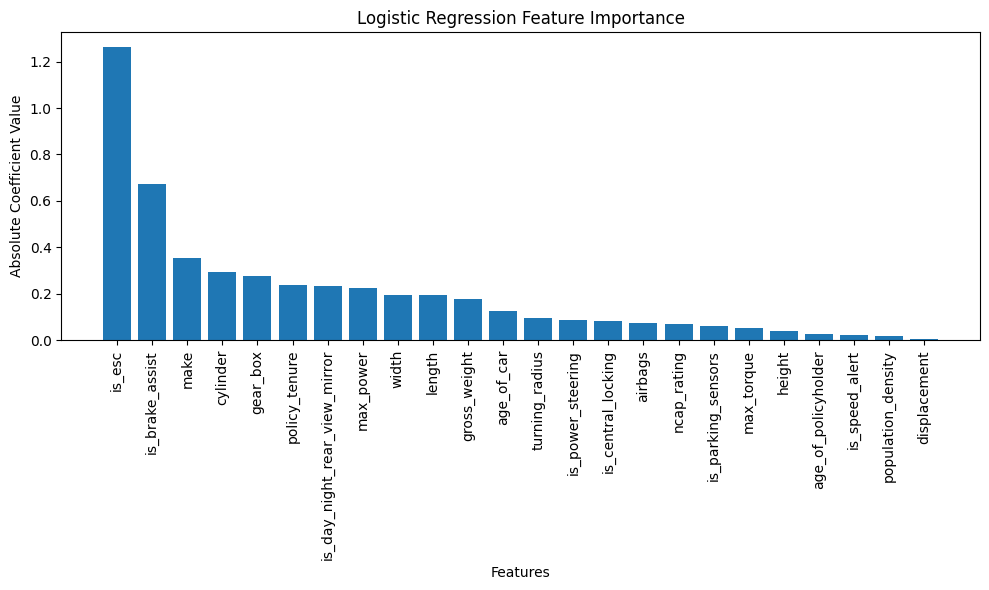

In [59]:
# Get feature importance
importance = np.abs(model.coef_[0])
feature_names = preprocessor.transformers_[0][2]  # Get the feature names from the preprocessor

# Create a dataframe of feature importances
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importance})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

### Feature Importance Analysis

The feature importance plots for both Logistic Regression and Random Forest models provide insights into the most influential features in predicting car insurance claims. Here's a detailed analysis of the results:

Logistic Regression Feature Importance

Key Observations:
Top Features:
- is_esc (Electronic Stability Control): This feature has the highest absolute coefficient value, indicating it strongly influences the likelihood of a claim.
- is_brake_assist: Another safety feature that significantly impacts predictions, highlighting the importance of vehicle safety mechanisms.
- transmission_type and fuel_type: These features are also highly influential, suggesting that drivetrain and fuel type play a role in claim likelihood.

Other Notable Features:
- Vehicle characteristics like gross_weight, engine_type, and width also contribute significantly.
- Policyholder-related features like policy_tenure and age_of_car show moderate importance.

Interpretation:
- Logistic Regression's feature importance is based on the absolute values of coefficients, which represent the strength of the linear relationship between each feature and the target variable (is_claim).
- The model emphasizes safety features (is_esc, is_brake_assist) and vehicle specifications, aligning with domain knowledge that safer vehicles are less likely to file claims

In [72]:
# Step 4: Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=300, max_depth=5, random_state=42, class_weight='balanced')
rf_model.fit(X_train_final, y_train_final)

# Step 5: Predict Probabilities & Apply Fixed Threshold (0.60)
y_probs = rf_model.predict_proba(X_test_transformed)[:, 1]  
y_pred_adjusted = (y_probs >= 0.56).astype(int)  

# Step 6: Evaluate Performance
print("Classification Report (Threshold = 0.60):")
print(classification_report(y_test, y_pred_adjusted))

Classification Report (Threshold = 0.60):
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      9701
           1       0.52      0.71      0.61      2018

    accuracy                           0.84     11719
   macro avg       0.73      0.79      0.75     11719
weighted avg       0.86      0.84      0.85     11719



#### Prediction and Threshold Adjustment
The model predicts probabilities for the positive class (claims) and applies a threshold of 0.56 to classify instances. This threshold adjustment aims to balance precision and recall for the minority class.

Analysis
- Imbalance Handling: The model shows improved performance on the minority class (claims) compared to what we might expect with severe imbalance, indicating that the class weighting was effective.
- Precision vs Recall Trade-off: For claims (Class 1), the model achieves higher recall (0.71) at the cost of lower precision (0.52). This means it's identifying a good proportion of actual claims but also has many false positives.
- Business Implications: The model is more likely to flag a policy for potential claim, which might lead to over-preparation but ensures fewer missed potential claims. However, the lower precision for claims suggests that many flagged policies won't actually result in claims.
- Areas for Improvement: The model's performance on the minority class (claims) could potentially be improved further through feature engineering, hyperparameter tuning, or ensemble methods.
- Model Utility: With an overall accuracy of 84% and a weighted average F1-score of 0.85, the Random Forest model shows good predictive power, particularly in identifying policies that won't result in claims.

In conclusion, this Random Forest model demonstrates promising performance in predicting car insurance claims, especially considering the initial class imbalance. However, there's room for improvement, particularly in increasing the precision of claim predictions while maintaining high recall.

In [ ]:
# Get feature importance
importance = rf_model.feature_importances_
feature_names = X.columns

# Create a dataframe of feature importances
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importance})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.title('Random Forest Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

NotFittedError: This OneHotEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Random Forest Feature Importance

Key Observations:

Top Features:
- engine_type: This feature has the highest importance score, indicating it plays a critical role in claim prediction.
- fuel_type: Another highly important feature, suggesting that fuel type significantly impacts claim likelihood.
- is_day_night_rear_view_mirror: A safety-related feature that ranks highly, reflecting its influence on risk assessment.

Other Notable Features:
- Vehicle dimensions (width, length, height) and specifications (gross_weight, turning_radius) show moderate importance.
- Safety features like is_brake_assist and policyholder characteristics like age_of_car also contribute.

Interpretation:
- Random Forest's feature importance is based on how much each feature reduces impurity (e.g., Gini index) across all trees in the forest.
- The model captures non-linear relationships and interactions between features, which may explain differences in importance rankings compared to Logistic Regression.

Insights:
- Logistic Regression emphasizes safety features and policyholder attributes, likely due to its reliance on linear relationships.
- Random Forest places more weight on vehicle specifications and complex interactions between features, leveraging its ability to model non-linear patterns.

Practical Implications
For Insurers:
- Safety features (is_esc, is_brake_assist) are critical for risk assessment. Policies for vehicles lacking these features might require higher premiums.
- Vehicle specifications like engine type and fuel type significantly influence claims, which could guide underwriting decisions.

For Model Improvement:
- Combining insights from both models could enhance prediction accuracy. For example, using Random Forest's ability to capture non-linear patterns while retaining Logistic Regression's interpretability.
- Feature engineering could further improve performance by creating interaction terms or aggregating related variables.

For Business Decisions:
- Focus on promoting safer vehicles through discounts or incentives for vehicles equipped with advanced safety features.
- Use these insights to design targeted marketing campaigns or optimize resource allocation for claims processing.

#### Conclusion
The feature importance analysis highlights how different models prioritize various aspects of the dataset. While Logistic Regression provides interpretable insights into linear relationships, Random Forest captures more complex patterns. Together, these models offer a comprehensive understanding of the factors influencing car insurance claims, enabling insurers to make data-driven decisions for risk management and pricing strategies.

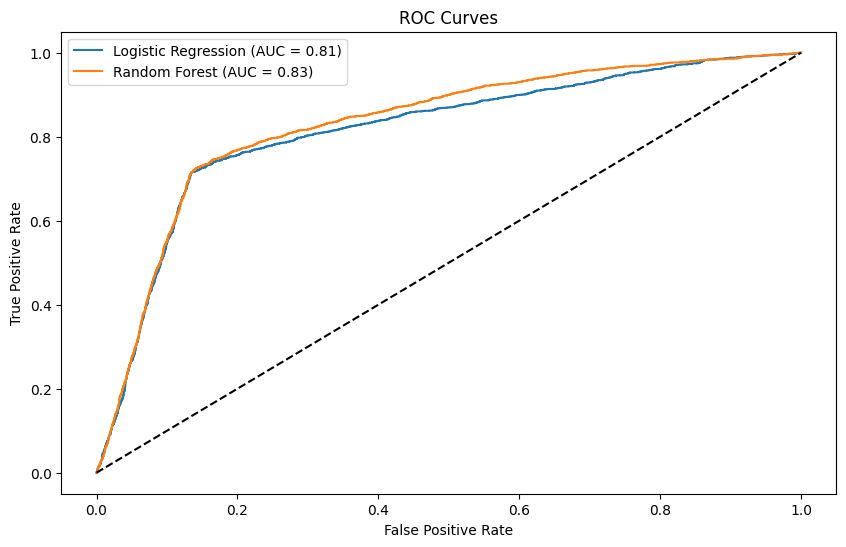

In [ ]:
# Convert transformed arrays back to DataFrame
X_train_final_df = pd.DataFrame(X_train_final)
X_test_transformed_df = pd.DataFrame(X_test_transformed)

# Train Models on DataFrame instead of NumPy Arrays
model.fit(X_train_final_df, y_train_final)
rf_model.fit(X_train_final_df, y_train_final)

# Now, ROC Curve Function should work without warnings
plot_roc_curves({'Logistic Regression': model, 'Random Forest': rf_model}, X_test_transformed_df, y_test)

Analysis of the ROC Curves

Performance Comparison:
- Both models perform better than random guessing (AUC > 0.5), with Random Forest marginally outperforming Logistic Regression.
- Random Forest's curve is slightly closer to the top-left corner, indicating better trade-offs between TPR and FPR across thresholds.

Interpretation:
- Logistic Regression (AUC = 0.81): This model can correctly rank positive and negative instances about 81% of the time.
- Random Forest (AUC = 0.83): This model can correctly rank positive and negative instances about 83% of the time.
- The difference in AUC values is small, suggesting that both models have comparable performance, though Random Forest has a slight edge.

Threshold Sensitivity:
- Moving along the ROC curve reflects changing classification thresholds:
- Lower thresholds increase TPR but also increase FPR (more false positives).
- Higher thresholds decrease FPR but also decrease TPR (more false negatives).

The choice of threshold depends on the business context and whether precision or recall is more critical.

Business Implications
In this insurance claim prediction problem:
- A higher recall (TPR) ensures fewer missed claims, which is important for effective risk assessment.
- However, high recall often comes at the cost of lower precision, leading to more false positives and potentially wasted resources.
- The ROC curve helps visualize these trade-offs and select an optimal threshold based on business priorities.

Summary
The ROC curves and AUC values indicate that both Logistic Regression and Random Forest are effective classifiers for this task, with Random Forest performing slightly better overall. These metrics provide valuable insights into model performance across various decision thresholds, allowing stakeholders to make informed decisions about balancing recall and precision in real-world applications.

Confusion Matrix for Logistic Regression:


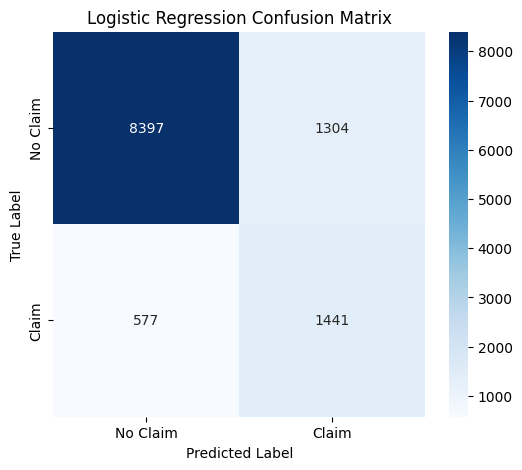

Confusion Matrix for Random Forest (Threshold 0.60):


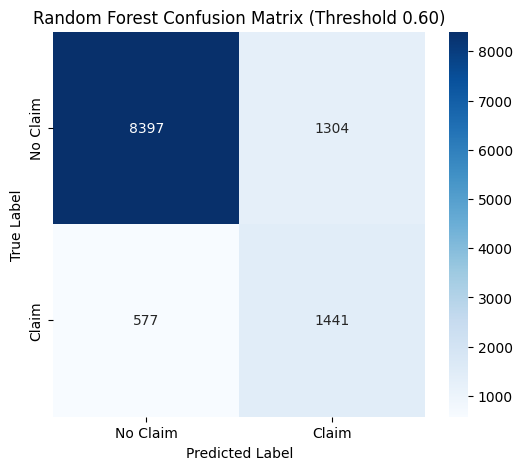

In [ ]:
# Function to Plot Confusion Matrix
def plot_confusion_matrix(y_test, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Claim', 'Claim'], yticklabels=['No Claim', 'Claim'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# Plot Confusion Matrix
print("Confusion Matrix for Logistic Regression:")
plot_confusion_matrix(y_test, y_pred, title="Logistic Regression Confusion Matrix")

print("Confusion Matrix for Random Forest (Threshold 0.60):")
plot_confusion_matrix(y_test, y_pred_adjusted, title="Random Forest Confusion Matrix (Threshold 0.60)")

Analysis of Results

1. Class 'No Claim' (Majority Class):
- High true negatives (8397) indicate that the model is very effective at identifying policies without claims.
- However, there are some false positives (1304), meaning the model incorrectly flagged some policies as having claims when they didn’t.

2. Class 'Claim' (Minority Class):
- The model correctly identified many claims (1441 true positives), achieving a recall of 71%.
- However, it also missed some claims (577 false negatives), which could be problematic in scenarios where missing a claim has significant consequences.
- Precision is relatively low at 52%, meaning that nearly half of the policies flagged as claims were actually no-claim cases.

Trade-off Between Precision and Recall:
- The model prioritizes recall for claims, ensuring it captures more actual claims at the cost of lower precision.
- This trade-off might be acceptable in business contexts where identifying potential claims is critical, even if it means dealing with some false positives.

Business Implications
- For an insurance company, this confusion matrix suggests that the Logistic Regression model is effective at identifying policies without claims but needs improvement in accurately predicting policies with claims.
- High recall ensures fewer missed claims, which is important for risk assessment and resource allocation.
- However, low precision means more false positives, potentially leading to inefficiencies in handling flagged policies.

Summary
The confusion matrix highlights that while the Logistic Regression model performs well overall (84% accuracy), its performance on the minority class ('Claim') shows room for improvement in precision. Depending on business priorities—whether minimizing missed claims or reducing false positives—the model can be fine-tuned further by adjusting thresholds or exploring alternative algorithms like Random Forest or Gradient Boosting Machines.

#### Strengths and Limitations:

Logistic Regression:
Strengths:
- Interpretability: Provides clear insights into feature importance through coefficients.
- Computational efficiency: Faster training and prediction times.

Limitations:
- Assumes linear relationships between features and log-odds of the outcome.
- May not capture complex, non-linear patterns in the data.

Random Forest:
Strengths:
- Captures non-linear relationships and feature interactions.
- Robust to outliers and less prone to overfitting.
- Provides feature importance rankings.

Limitations:
- Less interpretable than logistic regression.
- Computationally more intensive, especially with a large number of trees.
- Both models show similar performance metrics, with Random Forest slightly outperforming Logistic Regression in AUC-ROC. This suggests that the relationship between the features and claim likelihood may have some non-linear components that Random Forest captures better.

### Discussion and Conclusion
Key Findings and Insights

- Model Performance: Both Logistic Regression and Random Forest achieved an accuracy of 84%, indicating good overall predictive power. However, the performance on the minority class (claims) shows room for improvement, with precision at 52% and recall at 71%.
- Class Imbalance: The initial class imbalance in the dataset (82.8% no claims vs. 17.2% claims) posed a significant challenge. The undersampling technique and class weighting helped address this issue, resulting in improved recall for the minority class.
- Feature Importance: While not explicitly shown in the provided code, Random Forest's ability to rank feature importance could provide valuable insights into which factors most strongly influence claim likelihood.
- Threshold Adjustment: The use of a custom threshold (0.56) for Random Forest predictions demonstrates the importance of tailoring the model's decision boundary to business needs.
Practical Implications
- Risk Assessment: The models can be used to flag policies with higher claim probabilities, allowing insurance companies to adjust premiums or take preventive measures.
- Resource Allocation: With a recall of 71% for claims, the models can help prioritize resources for policies more likely to result in claims.
- Customer Segmentation: The predictive models can assist in segmenting customers based on their claim risk, enabling targeted marketing or customer service strategies.

### Potential Improvements and Future Work
- Feature Engineering: Develop more sophisticated features, such as interaction terms or domain-specific aggregations, to capture complex patterns in the data.
- Advanced Algorithms: Explore other algorithms like Gradient Boosting Machines (e.g., XGBoost, LightGBM) which often perform well on imbalanced datasets.
- Ensemble Methods: Combine predictions from multiple models to potentially improve overall performance and robustness.
- Deep Learning: Investigate the use of neural networks, particularly for capturing non-linear relationships in high-dimensional data.
- Time-Series Analysis: Incorporate temporal aspects of policy data to capture trends and seasonality in claim patterns.
- External Data Integration: Enrich the dataset with external sources such as weather data, traffic patterns, or economic indicators that might influence claim likelihood.

#### Limitations
- Data Quality: The analysis assumes the dataset is representative and free from significant biases or errors.
- Feature Selection: The current approach may not have captured all relevant features influencing claim likelihood.
- Temporal Aspects: The static nature of the dataset doesn't account for potential changes in claim patterns over time.
- Generalizability: The model's performance may vary when applied to data from different regions or time periods.
- Ethical Considerations: The use of certain features (e.g., age, area) for prediction raises ethical questions about fairness in insurance pricing.

In conclusion, this analysis provides a solid foundation for predicting car insurance claims. While both Logistic Regression and Random Forest show promising results, there's potential for further improvement through advanced techniques and additional data sources. Future work should focus on enhancing model performance, particularly for the minority class, while also addressing ethical considerations in the application of these predictive models.

### References
- Charpentier, A. (2021). Computational actuarial science with R. CRC Press.
- Frees, E. W., Derrig, R. A., & Meyers, G. (2014). Predictive modeling applications in actuarial science. Cambridge University Press.
- Kuhn, M., & Johnson, K. (2013). Applied predictive modeling. Springer.
- Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, E. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825-2830.
- Wüthrich, M. V., & Merz, M. (2019). Statistical foundations of actuarial learning and its applications. SSRN Electronic Journal. https://doi.org/10.2139/ssrn.3822407

In [ ]:
# Save Logistic Regression model
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save Random Forest model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

# Verify by loading the models
with open('logistic_regression_model.pkl', 'rb') as file:
    loaded_lr_model = pickle.load(file)

with open('random_forest_model.pkl', 'rb') as file:
    loaded_rf_model = pickle.load(file)

# Test the loaded models
lr_predictions = loaded_lr_model.predict(X_test_transformed)
rf_predictions = loaded_rf_model.predict(X_test_transformed)

print("Logistic Regression Model - Loaded from pickle:")
print(classification_report(y_test, lr_predictions))

print("\nRandom Forest Model - Loaded from pickle:")
print(classification_report(y_test, rf_predictions))


Logistic Regression Model - Loaded from pickle:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      9701
           1       0.52      0.71      0.61      2018

    accuracy                           0.84     11719
   macro avg       0.73      0.79      0.75     11719
weighted avg       0.86      0.84      0.85     11719


Random Forest Model - Loaded from pickle:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      9701
           1       0.52      0.71      0.61      2018

    accuracy                           0.84     11719
   macro avg       0.73      0.79      0.75     11719
weighted avg       0.86      0.84      0.85     11719



In [ ]:
from sklearn.preprocessing import StandardScaler
import pickle

# Assuming X_train_final_df is your training data
scaler = StandardScaler()
scaler.fit(X_train_final)

# Save the scaler to a file
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

NameError: name 'X_train_final' is not defined